<a href="https://colab.research.google.com/github/juhumkwon/source_code/blob/main/%EC%A3%BC%EC%84%B1%EB%B6%84%EB%B6%84%EC%84%9D(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

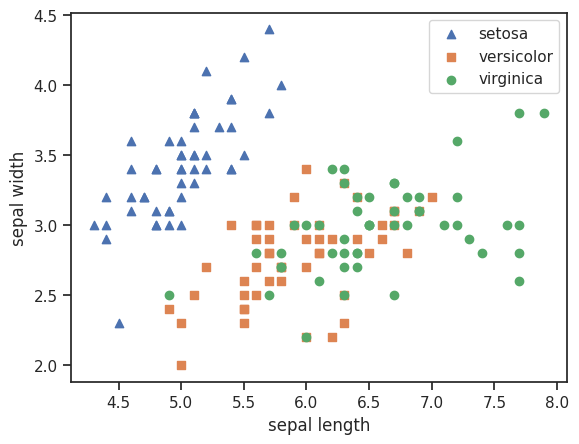

,pca_component_1,pca_component_2,target
0,-2.576120,0.474499,0
1,-2.415322,-0.678092,0
2,-2.659333,-0.348282,0


,pca_component_1,pca_component_2,target
count,1.500000e+02,1.500000e+02,150.000000
mean,5.684342e-16,1.184238e-17,1.000000
std,1.965393e+00,9.593078e-01,0.819232
min,-3.014405e+00,-2.654668e+00,0.000000
25%,-2.434041e+00,-6.017186e-01,0.000000
50%,3.804884e-01,2.099666e-02,1.000000
75%,1.751151e+00,5.962896e-01,2.000000
max,3.475896e+00,2.680473e+00,2.000000


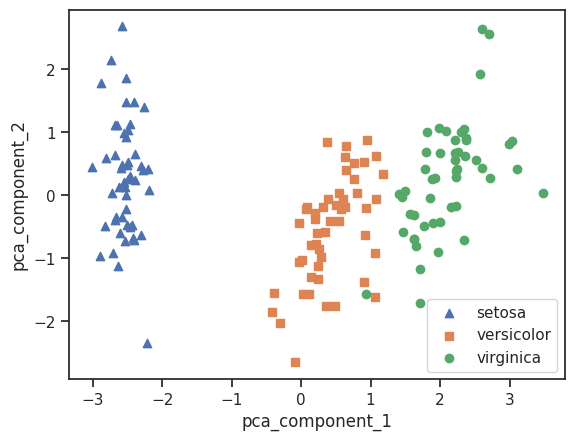

In [8]:
#출처:https://huidea.tistory.com/44

from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 사이킷런 내장 데이터 셋 API 호출
iris = load_iris()

# 넘파이 데이터 셋을 Pandas DataFrame으로 변환
columns = ['sepal_length','sepal_width','petal_length','petal_width']
irisDF = pd.DataFrame(iris.data , columns=columns)
irisDF['target']=iris.target
irisDF.head(3)
#=====================================================
#setosa는 세모, versicolor는 네모, virginica는 동그라미로 표현
markers=['^', 's', 'o']

#setosa의 target 값은 0, versicolor는 1, virginica는 2. 각 target 별로 다른 shape으로 scatter plot
for i, marker in enumerate(markers):
    x_axis_data = irisDF[irisDF['target']==i]['sepal_length']
    y_axis_data = irisDF[irisDF['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()
#=====================================================
# 주성분 분석 전에 표준화 (평균0, 편차 1의 표준정규분포로 각 칼럼데이터 표준화시키기)
from sklearn.preprocessing import StandardScaler

irisDF_inputs = irisDF.iloc[:,:4] # 타겟 값을 제외한 피쳐만 추출
iris_scaled = StandardScaler().fit_transform(irisDF_inputs)
iris_scale_DF = pd.DataFrame(iris_scaled)
iris_scale_DF['target'] = irisDF.target
iris_scale_DF.describe()
#=====================================================
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 표준화 시켜줌
iris_scaled = StandardScaler().fit_transform(irisDF)

# 주성분 분석 !
pca = PCA(n_components=2) # n_components 몇개의 피쳐로 데이터 차원 줄일건지

# fit( )과 transform( ) 을 호출하여 PCA 변환 데이터 반환
pca.fit(iris_scaled)
iris_pca = pca.transform(iris_scaled)

# PCA 환된 데이터의 컬럼명을 각각 pca_component_1, pca_component_2로 명명
pca_columns=['pca_component_1','pca_component_2']
irisDF_pca = pd.DataFrame(iris_pca,columns=pca_columns)
irisDF_pca['target']=iris.target
display(irisDF_pca.head(3))

# 주성분 분석 이후 평균/표준편차 확인
display(irisDF_pca.describe())
#=====================================================
#setosa를 세모, versicolor를 네모, virginica를 동그라미로 표시
markers=['^', 's', 'o']

#pca_component_1 을 x축, pc_component_2를 y축으로 scatter plot 수행.
for i, marker in enumerate(markers):
    x_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_1']
    y_axis_data = irisDF_pca[irisDF_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker,label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

